### Importing Necessary Library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Steps for EDA
- Importing necessary libraries
- Data Loading
- Data Understanding
- Problem Statement Understanding
- Missing Value
- Missing Values Imputation
- Univariate Analysis (One Variable at a time - check the distribution of the columns)
- BIvariate Analysis (Two Variable at a time - Relationship between two columns)
- Multiivariate Analysis (Multiple Variable at a time - check the distribution of the multiple columns)

In [3]:
df= pd.read_csv("titanic_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### Data Understanding

- PassengerId: Unique id for every passenger like a primary key
- Survived: Whether a passenger survived or not
- Pclass: Passenger Class basically class of travel
- Name: Name of the passenger
- Sex: Gender of the passenger
- Age: Age of the passenger
- SibSp: (Siblings + Spouse) Count of Siblings and Spouse along with passenger is travelling
- Parch: (Parent + Children) Count of Parent and Children along with passenger is travelling
- Ticket: Ticket id 
- Fare: Fare paid by passenger for travel (in $s)
- Cabin: Cabin no. or room no. allocated
- Embarked: Boarding Station

### Business Problem : Identify the factors affecting the survival of passengers in the titanic incident

### Check Missing Value


In [13]:
print(100*df.isnull().mean()) # gives % of missing values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [14]:
print(df.isnull().sum()) # gives number of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Missing Values Columns --> Cabin(77%), Age (19.86%), Embarked(0.22%)**
#### Strategy :
- Columns having high % of missing values ( generally >40% or 50%) are directly discard that column for the analysis
- Columns having missing values under acceptable range we prefer to impute then replace with some values.
- For numerical data we prefer to use mean and median (median is preferred)
- Median is not affected by outliers
- For categorical data we prefer mode

In [16]:
# Cabin have >40% of missing valuse
df1=df.drop("Cabin",axis=1)
# axis 1 for dropping the column axis =0 for dropping the row

In [19]:
# Fillna function will replace/impute all missing values of age column with median value i.e. 28
median=df1["Age"].median()
print(median)
df1["Age"]=df["Age"].fillna(median)
df1.isnull().sum()

28.0


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [22]:
df1["Embarked"].mode()
df1["Embarked"].mode()[0]
#In mode indexing is required

'S'

In [23]:
# Fillna function will replace/impute all missing values of Embarked column with mode value i.e. 'S'
mode=df1["Embarked"].mode()[0]
df1["Embarked"]=df1["Embarked"].fillna(mode)

In [24]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df1.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

In [27]:
df1.shape

(891, 11)

## Univariate Analysis

#### Numerical

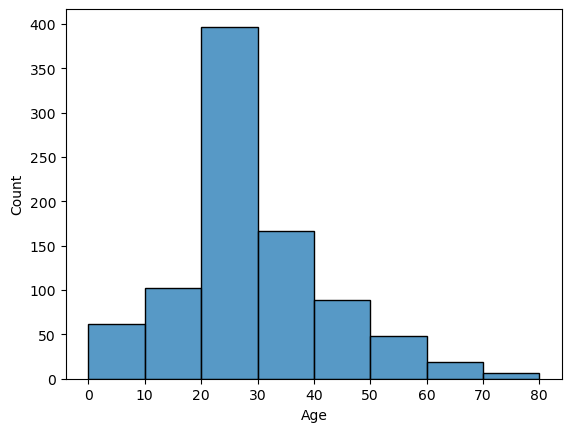

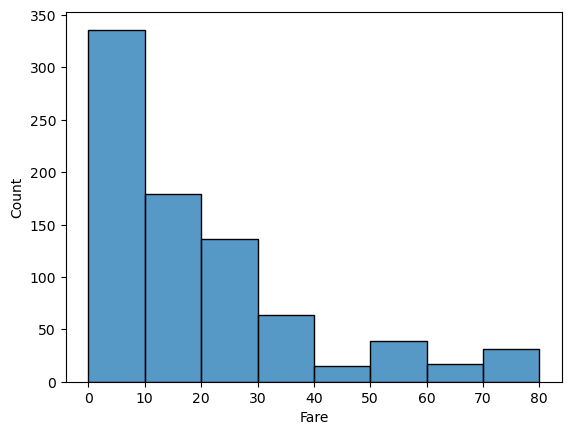

In [44]:

df1['Age'] = df1['Age'].replace([np.inf, -np.inf], np.nan)
df1['Age'] = df1['Age'].replace([np.inf, -np.inf], np.nan)
sns.histplot(x=df1['Age'], bins=[0,10,20,30,40,50,60,70,80])
plt.show()
sns.histplot(x=df1['Fare'], bins=[0,10,20,30,40,50,60,70,80])
plt.show()

In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
!pip install --upgrade pandas seaborn


Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------- ------------------------------ 71.7/294.9 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/294.9 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00


In [46]:
df1.Pclass.unique()

array([3, 1, 2], dtype=int64)

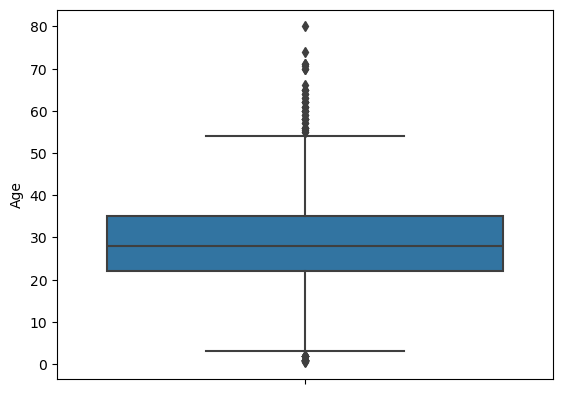

In [34]:
sns.boxplot(y=df1['Age'])
plt.show()

#### Categorical

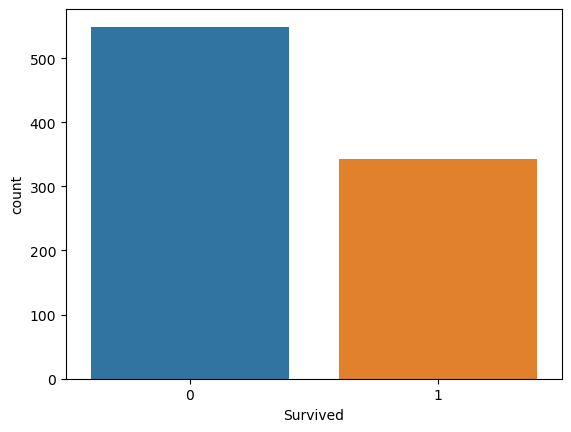

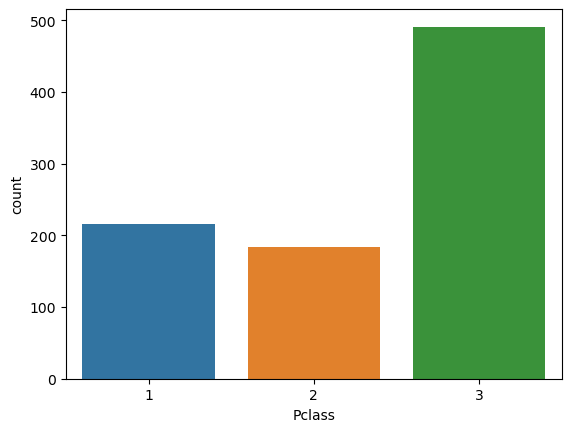

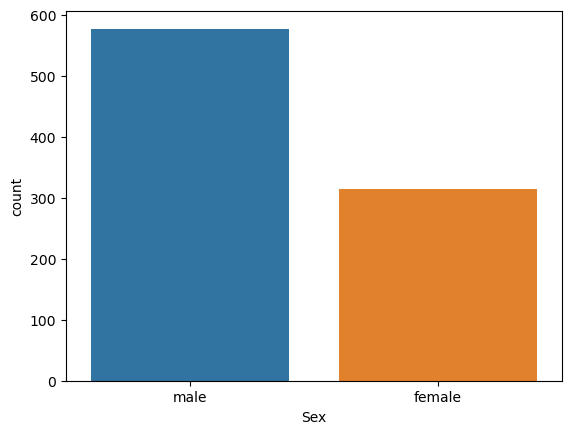

In [49]:
sns.countplot(x=df1['Survived'])
plt.show()
sns.countplot(x=df1['Pclass'])
plt.show()
sns.countplot(x=df1['Sex'])
plt.show()

### Bivariate Analysis

#### Numerical VS Numerical

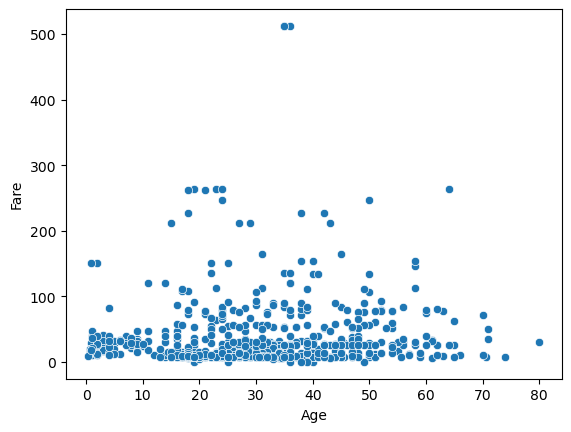

In [51]:
sns.scatterplot(x=df["Age"],y=df1['Fare'])
plt.show()

### Categorical VS Numerical

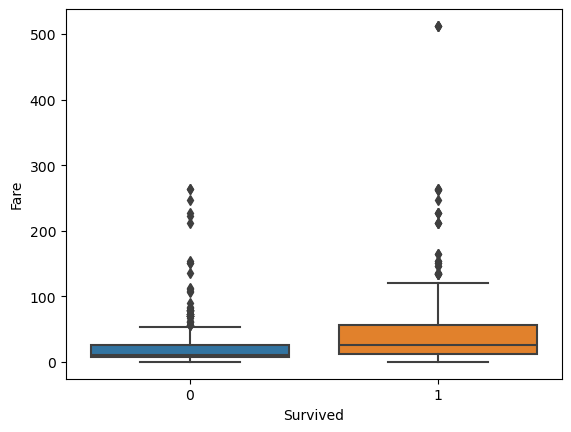

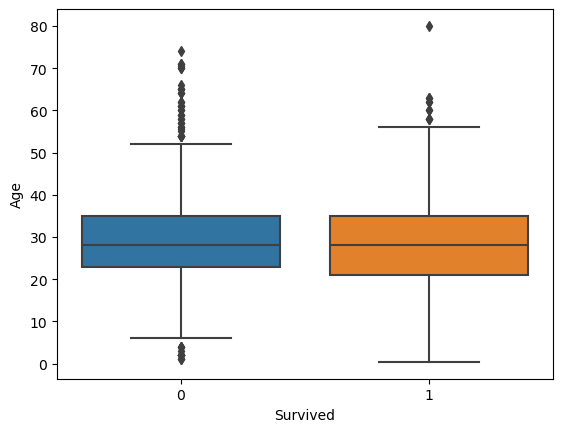

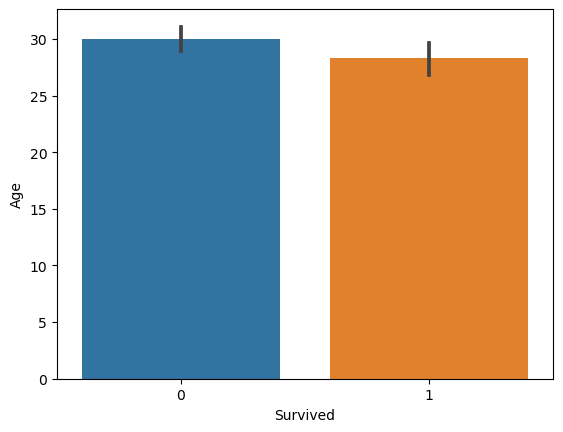

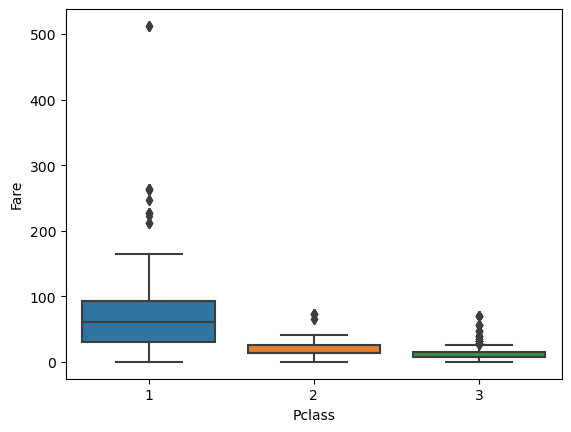

In [57]:
sns.boxplot(x=df["Survived"],y=df1['Fare'])
plt.show()
sns.boxplot(x=df["Survived"],y=df1['Age'])
plt.show()
sns.barplot(x=df["Survived"],y=df1['Age'])
plt.show()
sns.boxplot(x=df["Pclass"],y=df1['Fare'])
plt.show()

### Categorical VS Categorical

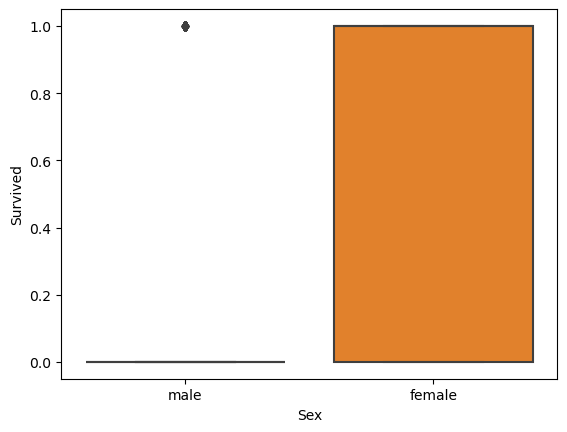

In [58]:
sns.boxplot(x=df["Sex"],y=df1['Survived'])
plt.show()

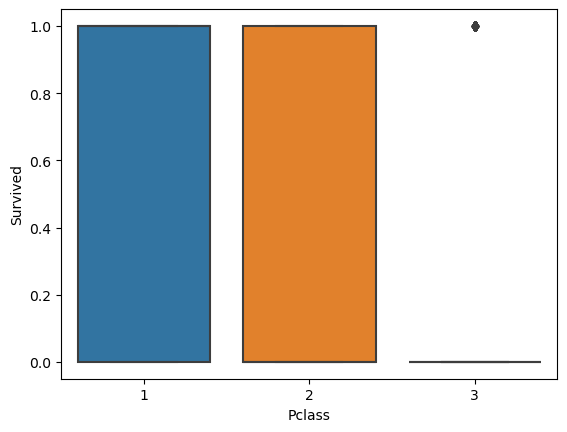

In [59]:
sns.boxplot(x=df["Pclass"],y=df1['Survived'])
plt.show()

### Multivariate Analysis

In [60]:
# Correlation is ideal metric for Numerical columns, but if your columns are binary categorical still industry prefer to use correlation 
# as it approximately right but not ideal, but not all suitable for non-binary categorical columns

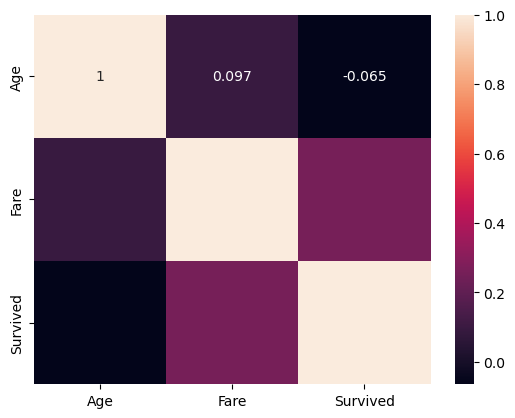

In [62]:
sns.heatmap(df1[['Age','Fare','Survived']].corr(),annot=True)
plt.show()

In [ ]:
## Correlation represents strength of relationship between variables
## Correlation lies in the range of -1 to 1
#--> Theoritcal Interpretation
## Negative correlation  (0 to -1) shows inverse relationship
## Positive correlation (0 to 1) shows direct relationship
## 0 or near by correlation represents no relationship.
#--> Industrial Interpretation
## Correlation value >0.7 --> High Positive Corrleation
## 0.3<Correlation value<0.7 --> Weak Positive Corrleation
## Correlation value <-0.7 --> High Negative Corrleation
## -0.7<Correlation value<-0.3 --> Weak Negative Corrleation
## -0.3<Correlation value<0.3 --> No or almost no Corrleation